In [1]:
# Necessary Imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../Input/dataset.csv')

In [3]:
# Data Preprocessing
# Split the Data into features and Target
X = data.drop('Outcome', axis=1)
y = data.Outcome

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [5]:
# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=7)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [6]:
# Initialize the Random Forest classifier
best_model = RandomForestClassifier(random_state=7)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator from the search
best_model = grid_search.best_estimator_

In [7]:
# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 99.50%

Confusion Matrix:
 [[273   0]
 [  2 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       273
           1       1.00      0.98      0.99       127

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



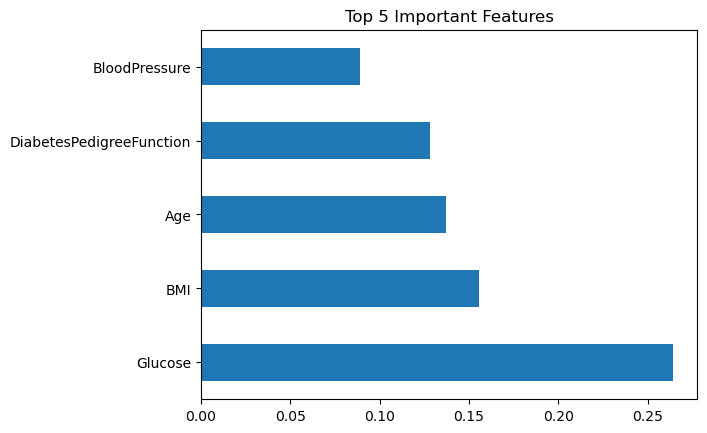

In [9]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.title("Top 5 Important Features")
plt.show()

In [10]:
# Make predictions with the best estimator
y_pred = best_model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Best Accuracy: {:.2f}%".format(accuracy * 100))
print("\nBest Confusion Matrix:\n", conf_matrix)
print("\nBest Classification Report:\n", class_report)

Best Accuracy: 99.50%

Best Confusion Matrix:
 [[273   0]
 [  2 125]]

Best Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       273
           1       1.00      0.98      0.99       127

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



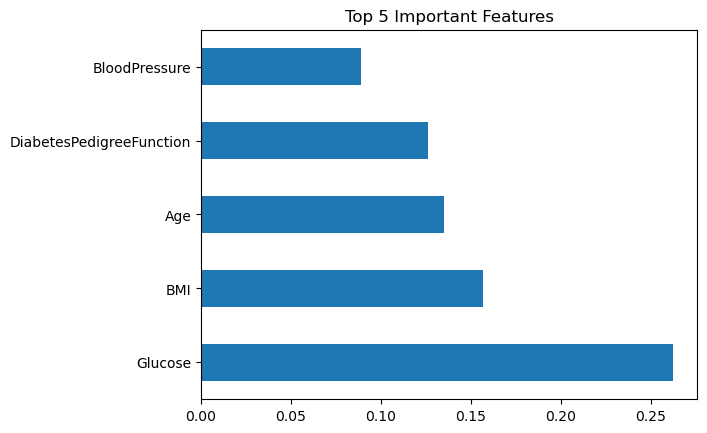

In [12]:
# Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.title("Top 5 Important Features")
plt.show()

In [13]:
# Predict the condition for individual person
# 1,115,70,30,96,34.6,0.529,32,1
individual = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [115],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [96],
    'BMI': [34.6],
    'DiabetesPedigreeFunction': [0.529],
    'Age': [32]
})

# Handle missing values and scaling
# individual = preprocess_individual_data(individual)

individual_report = model.predict(individual)
if individual_report == 0:
    print('congrats... You\'re allowed to eat sweets!')
else:
    print('Time to take your diet into consideration, Champ!')

congrats... You're allowed to eat sweets!


### Conclusion: base model performs well with 81.17% accuracy over Fine tuned model with 80.52% accuracy